# Tasks

## Loading the Iris dataset using sklearn.dataset()

Resources used in this section:

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

This function returns a dictionary-like object called 'Data'.

'Data' contains a number of attributes:

- data (refers to the data matrix i.e data frame/table. This contains a collection of lists, each containing a data point for each feature name (sepal length/width, petal length/width))

- target (this refers to the classification target i.e the data series that has been identified as a class in the data set. In the iris example, each species type is assigned a number, 0 through 2, classifying each row of data. When I view the  target_names variable for instance, the numpy array (['setosa', 'veriscolour', 'virginica']) is returned. The sklearn.datasets() function has identified that these are categorical variables that repeat and has accordingly identified them as our classification target and assinged them a number (0,2))

- target names (building on the above - the target names listed are setosa, veriscolour, and virginica. Because these pieces of data repeat, sklearn.datasets() has identified them as classes - otherwise referred to as targets in this context)

- DESCR (this attribute describes the data, listing things such as .......)

- feature names (as noted above, these have been identified as the features of each class of data, and correspond to the lists of data points contained in the data attribute)



In [3]:
import sklearn as skl

# using the sklearn.datasets() function to load in the iris data and storing as variable: 'data'
data = skl.datasets.load_iris()
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Task 2: Explore the Data Structure

In order to efficiently explore the data set, I am going to convert it into a Pandas Data Frame, so that I can firstly deal with just the critical and significant data (feature names, targets, actual data points such as sepal length and width, etc. rather than the DESCR attribute, file_name etc.) and secondly so I can call the pandas shape and head method etc.

To do this I am importing the pandas library. As sirected in the following resource: https://medium.com/@merilainen.vili/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataframe-6806fa42a98e#:~:text=Convert%20Data%20from%20Bunch%20Object,of%20this%20variable%20is%20sklearn.

According to Pandas documentation, the pd.Data_Frame method accepts the following parameters: data, index, columns, dtype, copy. After initially getting an error, I realised that I needed to specify the column labels as the feature names present in the iris data.

### print and explain:
- the shape of the dataset
    - When I print the shape of the data set using the .shape() method, python returns 150,4, indicating that there are 150 rows and 4 columns in the dataset.
- the first and last 5 rows
    - I used the head() and tail() methods to print the first and last 5 rows of the data set. This shows me that as instructed, python has created a data frame for me that contains 4 columns corresponding to the feature names in the iris data set (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)). Also as instructed, the data frame's index is set to the target values i.e the class for each piece of data (0,1,2 corresponding to each target name)

I defined a function in order to add in a column of species names corresponding to the class id column to enhance readability and enable my exploration of the data structure. I did so using this resource: https://saturncloud.io/blog/how-to-create-a-new-column-based-on-the-value-of-another-column-in-pandas/

I also reordered the columns working off this resource: https://docs.kanaries.net/topics/Pandas/pandas-reorder-columns



In [6]:
# importing pandas library
import pandas as pd

# checking type of iris dataset, stored as data
type(data)

# converting iris dataset 'data' to pandas dataframe for data exploration, creating an additional dataframe for the target values, and then combining the two so the target
# values and then combining the two so the target values can be viewed side by side with the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)
df_classes = pd.DataFrame(data.target, columns=['class_id'])
df_concat = pd.concat([df_classes, df], axis=1)

# printing the shape of the data set
print(df_concat.shape)

# printing the first 5 rows
print(df_concat.head(5))

# printing last 5 rows
print(df_concat.tail(5))

# defining a function to add a column for the class name (versicolor, virginica etc.)
def est_class(class_id):
    if class_id == 0:
        return 'setosa'
    if class_id == 1:
        return 'versicolor'
    if class_id == 2:
        return 'virginica'
    
df_concat['class_name'] = df_concat['class_id'].apply(est_class)

df_concat.head()

df_reord = df_concat.reindex(['class_id', 'class_name', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], axis=1)

df_reord



(150, 5)
   class_id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0         0                5.1               3.5                1.4   
1         0                4.9               3.0                1.4   
2         0                4.7               3.2                1.3   
3         0                4.6               3.1                1.5   
4         0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  
     class_id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
145         2                6.7               3.0                5.2   
146         2                6.3               2.5                5.0   
147         2                6.5               3.0                5.2   
148         2                6.2               3.4                5.4   
149         2                5.9               3.0                5

,class_id,class_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,setosa,5.1,3.5,1.4,0.2
1,0,setosa,4.9,3.0,1.4,0.2
2,0,setosa,4.7,3.2,1.3,0.2
3,0,setosa,4.6,3.1,1.5,0.2
4,0,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,2,virginica,6.7,3.0,5.2,2.3
146,2,virginica,6.3,2.5,5.0,1.9
147,2,virginica,6.5,3.0,5.2,2.0
148,2,virginica,6.2,3.4,5.4,2.3


## Task 3: Summarising the dataset

Resources used: https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html

As Numpy has fast built-in aggregation functions for working on arrays, I convert the dataset into a numpy array below.

In [7]:
import numpy as np

iris_array = np.array(df_reord)
print(iris_array)

[[0 'setosa' 5.1 3.5 1.4 0.2]
 [0 'setosa' 4.9 3.0 1.4 0.2]
 [0 'setosa' 4.7 3.2 1.3 0.2]
 [0 'setosa' 4.6 3.1 1.5 0.2]
 [0 'setosa' 5.0 3.6 1.4 0.2]
 [0 'setosa' 5.4 3.9 1.7 0.4]
 [0 'setosa' 4.6 3.4 1.4 0.3]
 [0 'setosa' 5.0 3.4 1.5 0.2]
 [0 'setosa' 4.4 2.9 1.4 0.2]
 [0 'setosa' 4.9 3.1 1.5 0.1]
 [0 'setosa' 5.4 3.7 1.5 0.2]
 [0 'setosa' 4.8 3.4 1.6 0.2]
 [0 'setosa' 4.8 3.0 1.4 0.1]
 [0 'setosa' 4.3 3.0 1.1 0.1]
 [0 'setosa' 5.8 4.0 1.2 0.2]
 [0 'setosa' 5.7 4.4 1.5 0.4]
 [0 'setosa' 5.4 3.9 1.3 0.4]
 [0 'setosa' 5.1 3.5 1.4 0.3]
 [0 'setosa' 5.7 3.8 1.7 0.3]
 [0 'setosa' 5.1 3.8 1.5 0.3]
 [0 'setosa' 5.4 3.4 1.7 0.2]
 [0 'setosa' 5.1 3.7 1.5 0.4]
 [0 'setosa' 4.6 3.6 1.0 0.2]
 [0 'setosa' 5.1 3.3 1.7 0.5]
 [0 'setosa' 4.8 3.4 1.9 0.2]
 [0 'setosa' 5.0 3.0 1.6 0.2]
 [0 'setosa' 5.0 3.4 1.6 0.4]
 [0 'setosa' 5.2 3.5 1.5 0.2]
 [0 'setosa' 5.2 3.4 1.4 0.2]
 [0 'setosa' 4.7 3.2 1.6 0.2]
 [0 'setosa' 4.8 3.1 1.6 0.2]
 [0 'setosa' 5.4 3.4 1.5 0.4]
 [0 'setosa' 5.2 4.1 1.5 0.1]
 [0 'setos

### Calculating the mean of each feature

In [8]:
# firstly slicing for the sepal length column and then saving that as variable sepal_l_mean
sepal_l_mean = np.mean(iris_array[:, 2])
# Then printing the mean of that feature
print(f"The mean sepal length (cm) is {sepal_l_mean}")

sepal_w_mean = np.mean(iris_array[:, 3])
print(f"The mean sepal width (cm) is {sepal_w_mean}")

petal_l_mean = np.mean(iris_array[:, 4])
print(f"The mean petal length (cm) is {petal_l_mean}")

petal_w_mean = np.mean(iris_array[:, 5])
print(f"The mean petal width (cm) is {petal_w_mean}")

The mean sepal length (cm) is 5.843333333333335
The mean sepal width (cm) is 3.057333333333334
The mean petal length (cm) is 3.7580000000000027
The mean petal width (cm) is 1.199333333333334


### Calculating the minimum value for each feature

In [9]:
sepal_l_min = np.min(iris_array[:, 2])
print(f"The minimum value for the sepal length (cm) is {sepal_l_min}")

sepal_w_min = np.min(iris_array[:, 3])
print(f"The minimum value for the sepal width (cm) is {sepal_w_min}")

petal_l_min = np.min(iris_array[:, 4])
print(f"The minimum value for the petal length (cm) is {petal_l_min}")

petal_w_min = np.min(iris_array[:, 5])
print(f"The minimim value for the petal width (cm) is {petal_w_min}")

The minimum value for the sepal length (cm) is 4.3
The minimum value for the sepal width (cm) is 2.0
The minimum value for the petal length (cm) is 1.0
The minimim value for the petal width (cm) is 0.1


### Calculating the maximum value for each feature

In [10]:
sepal_l_max = np.max(iris_array[:, 2])
print(f"The maximum value for the sepal length (cm) is {sepal_l_max}")

sepal_w_max = np.max(iris_array[:, 3])
print(f"The maximum value for the sepal width (cm) is {sepal_w_max}")

petal_l_max = np.max(iris_array[:, 4])
print(f"The maximum value for the petal length (cm) is {petal_l_max}")

petal_w_max = np.max(iris_array[:, 5])
print(f"The maximum value for the petal width (cm) is {petal_w_max}")

The maximum value for the sepal length (cm) is 7.9
The maximum value for the sepal width (cm) is 4.4
The maximum value for the petal length (cm) is 6.9
The maximum value for the petal width (cm) is 2.5


### Caluclating the standard deviation for each feature

In [11]:
sepal_l_sd = np.std(iris_array[:, 2])
print(f"The standard deviation for the sepal length (cm) is {sepal_l_sd}")

sepal_w_sd = np.std(iris_array[:, 3])
print(f"The standard deviation for the sepal width (cm) is {sepal_w_sd}")

petal_l_sd = np.std(iris_array[:, 4])
print(f"The standard deviation for the petal length (cm) is {petal_l_sd}")

petal_w_sd = np.std(iris_array[:, 5])
print(f"The standard deviation for the petal width (cm) is {petal_w_sd}")

The standard deviation for the sepal length (cm) is 0.8253012917851409
The standard deviation for the sepal width (cm) is 0.43441096773549437
The standard deviation for the petal length (cm) is 1.7594040657753032
The standard deviation for the petal width (cm) is 0.7596926279021594


### Calculating the median value for each feature

In [12]:
sepal_l_med = np.median(iris_array[:, 2])
print(f"The median value for the sepal length (cm) is {sepal_l_med}")

sepal_w_med = np.median(iris_array[:, 3])
print(f"The median value for the sepal width (cm) is {sepal_w_med}")

petal_l_med = np.median(iris_array[:, 4])
print(f"The median value for the petal length (cm) is {petal_l_med}")

petal_w_med = np.median(iris_array[:, 5])
print(f"The median value for the petal width (cm) is {petal_w_med}")

The median value for the sepal length (cm) is 5.8
The median value for the sepal width (cm) is 3.0
The median value for the petal length (cm) is 4.35
The median value for the petal width (cm) is 1.3


## Task 4: Visualise features

### plotting a histogram for each feature

Sources: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

For each feature (sepal length/width, petal length/width) I am creating a histogram that shows the max, min and median values under each species.

### Sepal length (cm) histogram

This histogram shows the sepal length (cm) data. I played around with number of bins, and found that 3 bins gave me the clearest insight, which is that the majority of iris flowers regardless of species have sepal width in the range of approximately 5.5 to 6.5 cm.

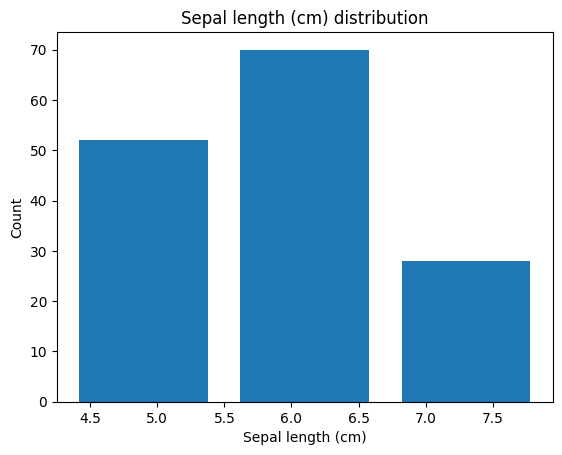

In [13]:
import matplotlib
from matplotlib import pyplot as plt

iris_array_num_only = np.delete(iris_array, [1], axis=1)

plt.hist(iris_array_num_only[:, 1], bins=3, rwidth=0.8)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Count')
plt.title('Sepal length (cm) distribution')
plt.show()

### sepal width (cm) histogram

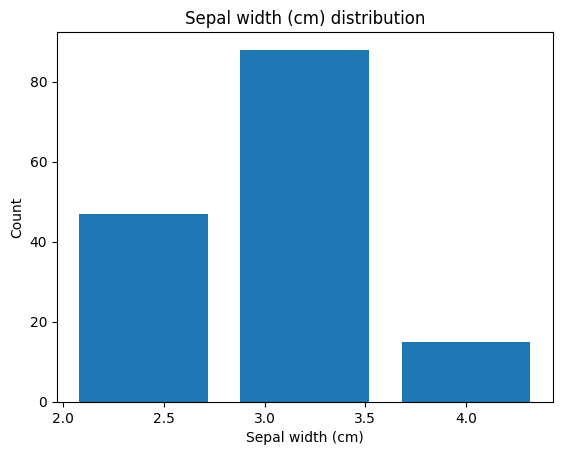

In [14]:
plt.hist(iris_array_num_only[:, 2], bins=3, rwidth=0.8)
plt.xlabel('Sepal width (cm)')
plt.ylabel('Count')
plt.title('Sepal width (cm) distribution')
plt.show()

### petal length hist

Again, I adjusted the number of bins in order to draw out an obvious insight. Here I could see that by a small margin, the majority of plants have a petal length of between 1 and 2 cm.

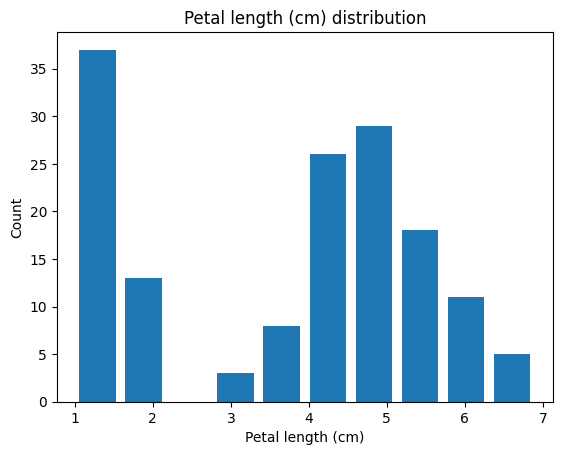

In [15]:
plt.hist(iris_array_num_only[:, 3], bins=10, rwidth=0.8)
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.title('Petal length (cm) distribution')
plt.show()

### petal width hist

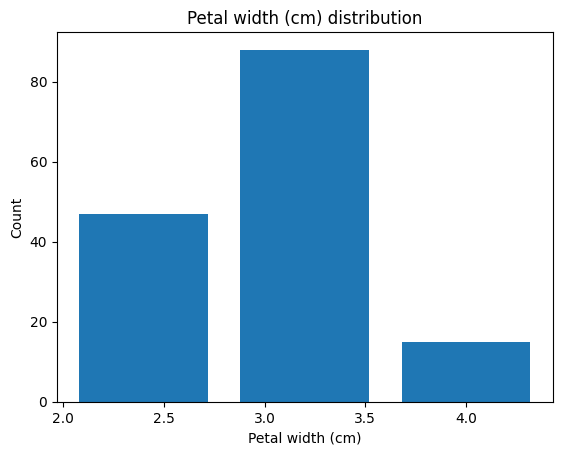

In [16]:
plt.hist(iris_array_num_only[:, 2], bins=3, rwidth=0.8)
plt.xlabel('Petal width (cm)')
plt.ylabel('Count')
plt.title('Petal width (cm) distribution')
plt.show()

## Task 7: create box plots to analyse distributions

### Describing the box plot
The box plot clearly shows us that the virginica species has the greatest median petal length, and setosa the lowest.

[[0 'setosa' 5.1 3.5 1.4 0.2]
 [0 'setosa' 4.9 3.0 1.4 0.2]
 [0 'setosa' 4.7 3.2 1.3 0.2]
 [0 'setosa' 4.6 3.1 1.5 0.2]
 [0 'setosa' 5.0 3.6 1.4 0.2]
 [0 'setosa' 5.4 3.9 1.7 0.4]
 [0 'setosa' 4.6 3.4 1.4 0.3]
 [0 'setosa' 5.0 3.4 1.5 0.2]
 [0 'setosa' 4.4 2.9 1.4 0.2]
 [0 'setosa' 4.9 3.1 1.5 0.1]
 [0 'setosa' 5.4 3.7 1.5 0.2]
 [0 'setosa' 4.8 3.4 1.6 0.2]
 [0 'setosa' 4.8 3.0 1.4 0.1]
 [0 'setosa' 4.3 3.0 1.1 0.1]
 [0 'setosa' 5.8 4.0 1.2 0.2]
 [0 'setosa' 5.7 4.4 1.5 0.4]
 [0 'setosa' 5.4 3.9 1.3 0.4]
 [0 'setosa' 5.1 3.5 1.4 0.3]
 [0 'setosa' 5.7 3.8 1.7 0.3]
 [0 'setosa' 5.1 3.8 1.5 0.3]
 [0 'setosa' 5.4 3.4 1.7 0.2]
 [0 'setosa' 5.1 3.7 1.5 0.4]
 [0 'setosa' 4.6 3.6 1.0 0.2]
 [0 'setosa' 5.1 3.3 1.7 0.5]
 [0 'setosa' 4.8 3.4 1.9 0.2]
 [0 'setosa' 5.0 3.0 1.6 0.2]
 [0 'setosa' 5.0 3.4 1.6 0.4]
 [0 'setosa' 5.2 3.5 1.5 0.2]
 [0 'setosa' 5.2 3.4 1.4 0.2]
 [0 'setosa' 4.7 3.2 1.6 0.2]
 [0 'setosa' 4.8 3.1 1.6 0.2]
 [0 'setosa' 5.4 3.4 1.5 0.4]
 [0 'setosa' 5.2 4.1 1.5 0.1]
 [0 'setos

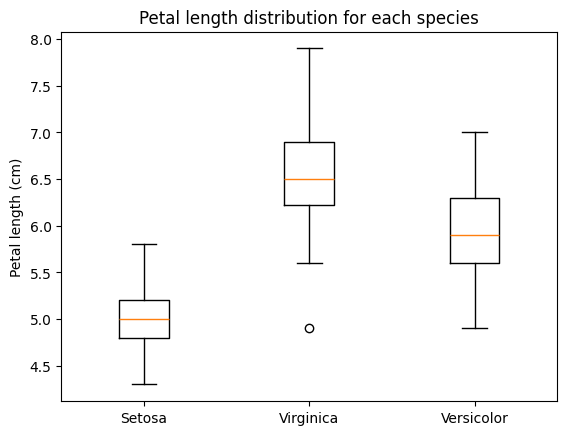

In [33]:
print(iris_array)

#creating subgroups for each species first of all
setosa_pl = iris_array[iris_array[:, 1] == 'setosa'][:, 2]
virginica_pl = iris_array[iris_array[:, 1] == 'virginica'][:, 2]
versicolor_pl = iris_array[iris_array[:, 1] == 'versicolor'][:, 2]

#checking subgroups are correct
print(setosa_pl)
print(versicolor_pl)
print(virginica_pl)

# creating a multi-boxplot to compare the petal length of each species
fig, ax = plt.subplots()
ax.boxplot([setosa_pl, virginica_pl, versicolor_pl])
ax.set_xticklabels(['Setosa', 'Virginica', 'Versicolor'])
plt.ylabel('Petal length (cm)')
plt.title('Petal length distribution for each species')
plt.show()



## End